In [4]:
# les données sont recup depuis La library national de medecine
# c est excellent -> remerciement

# https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#project-a225


In [25]:
pwd

'C:\\Users\\bilel\\Desktop\\python\\Formation Udemy\\formation 5 Deep learning avec tensor'

In [2]:
#deplacer les files vers le repertoire de travail 

import os
import shutil

# # path_init_zip  = '/Users/bilel/Downloads/cell_images.zip'
# path_init  = '/Users/bilel/Downloads/cell_images.zip'
# path_final = '/Users/bilel/Desktop/python/Formation Udemy/formation 5 Deep learning avec tensor/cell_images.zip'

# shutil.move( path_init , path_final )

In [ ]:
# extraction des files 
z = zipfile.ZipFile('cell_images.zip', 'r')
z.extractall()

In [3]:
#lib 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
# etape de definition des paths 

In [4]:
#nom des repertoires dans le new doc
data_dir = 'cell_images'
sets = os.listdir (data_dir)
sets[0]

'test'

In [5]:
# 71 . CNN sur les images PNG JPEG

# nous definissons le path des 2 sets 
test_path = data_dir + '/'  + str ( sets[0] )   
train_path = data_dir + '/' + str ( sets[1] )   

In [6]:
diag = os.listdir(train_path)
diag
#c est des photo de cellules infectées ou non par la malaria

['parasitized', 'uninfected']

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
train_path_para = train_path + '/' + diag [0]
train_path_not_para = train_path + '/' + diag [1]


test_path_para = test_path + '/' + diag [0]
test_path_not_para = test_path + '/' + diag [1]

In [9]:
#les files (ici des photos) dans le repertoire train_path_para
os.listdir(train_path_para)

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
# le path de la photo 1 
photo_1 = os.listdir(train_path_para) [0]
photo_1 = train_path_para + '/' + photo_1
photo_1

'cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
#matrice de la photo
# imread = permet de convertir une photo en matrice 

imread(photo_1)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

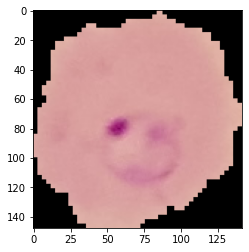

In [11]:
#affiche une photo de cellule infectée
plt.imshow (imread(photo_1))

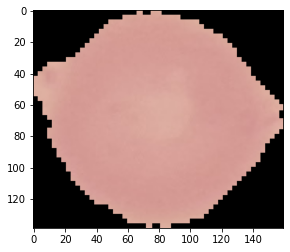

In [12]:
#photo de cellule non infectée
photo2 = os.listdir (train_path_not_para)[0]

photo2 = train_path_not_para + '/' +photo2

photo2

plt.imshow(imread( photo2));

In [13]:
#pour le rep train : le nombre de cas 
print ('Nombre d infecte:',len(os.listdir ( train_path_para )))
print ('Nombre de non infecte:',len(os.listdir ( train_path_not_para )))

Nombre d infecte: 12480
Nombre de non infecte: 12480


In [14]:
#pour le rep test : le nombre de cas 

print ('test_path_para :',len(os.listdir (test_path_para)))
print ('test_path_not_para :',len(os.listdir (test_path_not_para)))

test_path_para : 1300
test_path_not_para : 1300


In [ ]:
# nous avons un nombre de cas identique pour le train et le test 
# donnée équilibré

In [15]:
# check de la shape des photos 

liste1 = []
liste2 = []
color = []

# for i in os.listdir ( train_path_para ): 
#     imread(i).shape
    

for i in os.listdir ( train_path_para ) [:-1] : 
    photo = train_path_para +'/' + str (i)
    l1,l2,c = imread(photo).shape
    liste1.append ( l1 )
    liste2.append ( l2 )
    color.append ( c )

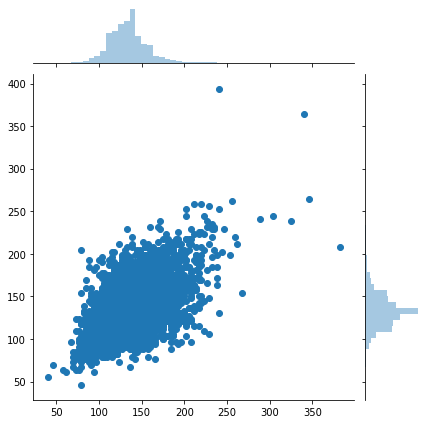

In [16]:
sns.jointplot (liste1 ,    liste2) ;

# les images sont centré autour de 130/130 ou 150/150
# nous prendrons les mean

In [17]:
# redimentionner la nouvelle shape

print (np.mean(liste2))
print (np.mean(liste1))

# le CNN n est pas capable d entrainer un mmdele avec des shapes et des tailles 
# differentes

# La shape sera donc (130,130,3)
image_shape = (130,130,3)

# si plus petite, cela rajoute du padding du rembourage
# si plus grande cela coupe l image 

133.66447632021797
134.360205144643


In [50]:
# image data generator

# la shape est 
# 130*130*3 = 50700
# image_shape = (130,130,3)
# c est enormement de points 

# pour traiter ces points il va falloir les manipuler les transformer , ...
# pour cela il nous faut image data generator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# help (ImageDataGenerator)

#creation d une instance 
image_gen = ImageDataGenerator ( rotation_range=20, # rotation
                                 width_shift_range = 0.1, # etendre largeur 10%
                                 height_shift_range=0.1,# etendre hauteur de 10% 
                                 shear_range=0.1,  #coupe une partie de limage
                                 zoom_range=0.1,   # zoom
                                 horizontal_flip=True, #basculement horizontal
#                                  rescale = 1/255 , # il est également possible de normaliser les photos
                                 fill_mode='nearest') #remplir les valeurs nan          )

In [19]:
# analyse si photo normalisé 
imread(photo_1)   #lecture de al photo en matrice 
imread(photo_1).max()  #les points sont deja normalisés

0.9098039

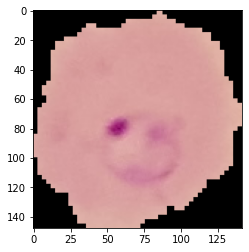

In [20]:
#photo 1 de base
para_img = imread( photo_1)

plt.imshow(para_img);

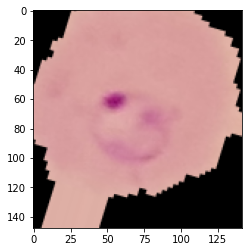

In [21]:
#photo 1 avec une ou des transformations
plt.imshow( image_gen.random_transform(imread( photo_1)) )

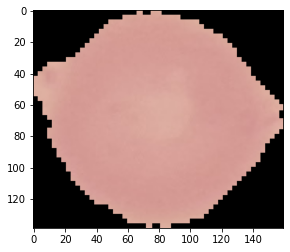

In [22]:
#photo 2 de base
plt.imshow (imread (photo2) )

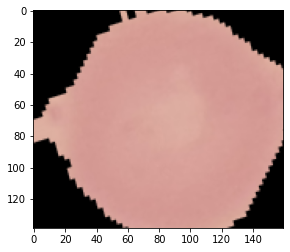

In [23]:
#transformation 
plt.imshow ( image_gen.random_transform (imread (photo2) ))

In [24]:
# definir les repertoires qui definissent nos lots d image (batchs)

image_gen.flow_from_directory (train_path)

# il est necessaire que l arborescence des files soient separer en 2 classes
# dans notre cas nous avons 2 dossier compossant le dossier 
# les parazited 
# et les unifected

Found 24958 images belonging to 2 classes.


In [40]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [25]:
#definir le repertoire avec les batch de teest 

image_gen.flow_from_directory (test_path)


Found 2600 images belonging to 2 classes.


In [26]:
# Creation du modele 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense

model = Sequential ()

model.add ( Conv2D ( filters = 32 , 
                   kernel_size = (3,3) ,
                   input_shape = image_shape ,   #c est la taille choisie
                   activation = 'relu'  ) )
           
model.add (MaxPool2D (pool_size=(2, 2)))
           
model.add ( Conv2D ( filters = 64 , 
                   kernel_size = (3,3) ,
                   input_shape = image_shape ,   #c est la taille choisie
                   activation = 'relu'  ) )
           
model.add (MaxPool2D (pool_size=(2, 2)))
           
model.add ( Conv2D ( filters = 64 , 
                   kernel_size = (3,3) ,
                   input_shape = image_shape ,   #c est la taille choisie
                   activation = 'relu'  )  )
           
model.add (MaxPool2D (pool_size=(2, 2)))
           
model.add ( Flatten () )
           
model.add (Dense (128 , activation = 'relu'))
           
model.add (Dropout (0.5)) #desactive la moitié des neurones aleatoirement (evite l overfiting)

model.add (Dense (1 , activation = 'sigmoid'))  #calssification binaire 


In [28]:
model.compile (  optimizer='adam',
    loss='binary_crossentropy',
    metrics= ['accuracy'], )

In [29]:
#on regarde le resume du model
#la couche dense comporte bcp d elements 
# modele long a compiler 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

ea = EarlyStopping (monitor='val_loss',
    patience=3,)

In [31]:
#definition de la taille du batch 
# batch nombre d image en mm temps 

# generalement c est 2 puissance x 
# x est plus elevé si machine elevé 
# plus le batch est faible plus le temps d entrrainement est elevé
batch_size = 16

In [32]:
image_shape

(130, 130, 3)

In [ ]:
#generateur d image de train et de test (bien parametrer)

In [33]:
train_image_gen = image_gen.flow_from_directory (  train_path,
                                                   target_size=(130, 130),
                                                   color_mode='rgb', 
                                                   class_mode='binary',
                                                   batch_size=batch_size,  )

Found 24958 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory (  test_path,
                                                   target_size=(130, 130),
                                                   color_mode='rgb', 
                                                   class_mode='binary',
                                                   batch_size=batch_size, 
                                               shuffle = False)

Found 2600 images belonging to 2 classes.


In [63]:
# retourne les classes pour le train
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [64]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [35]:
# fit

results = model.fit (train_image_gen , #( feature target set de train)
                    epochs = 20 ,
                    validation_data = test_image_gen , #( feature target set de test)
                    callbacks = [ea])

Epoch 1/20
1560/1560 [==============================] - 412s 264ms/step - loss: 1.0424 - accuracy: 0.5396 - val_loss: 0.7313 - val_accuracy: 0.5365
Epoch 2/20
1560/1560 [==============================] - 432s 277ms/step - loss: 0.6846 - accuracy: 0.5642 - val_loss: 0.6899 - val_accuracy: 0.5654
Epoch 3/20
1560/1560 [==============================] - 428s 275ms/step - loss: 0.6757 - accuracy: 0.5836 - val_loss: 0.6914 - val_accuracy: 0.5631
Epoch 4/20
1560/1560 [==============================] - 444s 285ms/step - loss: 0.6712 - accuracy: 0.5966 - val_loss: 0.6639 - val_accuracy: 0.6027
Epoch 5/20
1560/1560 [==============================] - 428s 274ms/step - loss: 0.6660 - accuracy: 0.6058 - val_loss: 0.6579 - val_accuracy: 0.6119
Epoch 6/20
1560/1560 [==============================] - 422s 270ms/step - loss: 0.4940 - accuracy: 0.7526 - val_loss: 0.2728 - val_accuracy: 0.9065
Epoch 7/20
1560/1560 [==============================] - 8521s 5s/step - loss: 0.2393 - accuracy: 0.9213 - val_lo

In [36]:
#le modele c est entrainer pdt + de 45min 
# sauvegarde du modele
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')


In [ ]:
#pour la prochaine fois je peux directement load mon mdele
model = load_model ('malaria_detector.h5')
model.summary ()

In [37]:
df = pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.042428,0.539627,0.731270,0.536538
1,0.684583,0.564188,0.689906,0.565385
2,0.675746,0.583620,0.691447,0.563077
3,0.671156,0.596642,0.663894,0.602692
4,0.665970,0.605778,0.657911,0.611923
5,0.494006,0.752584,0.272785,0.906538
6,0.239256,0.921268,0.214431,0.933077
7,0.199714,0.940781,0.185757,0.939615
8,0.187851,0.943745,0.214283,0.923846
9,0.184935,0.942063,0.188300,0.936538


<AxesSubplot:>

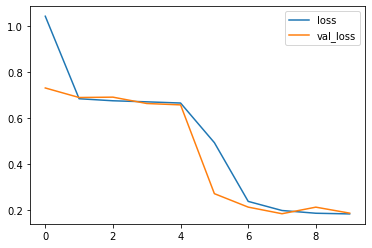

In [38]:
df [[ 'loss' ,  'val_loss' ]].plot ()

<AxesSubplot:>

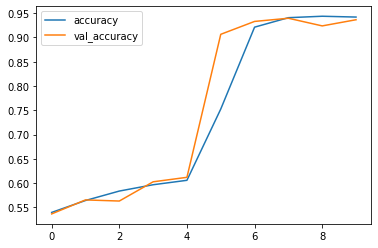

In [39]:
df [[ 'accuracy' ,  'val_accuracy' ]].plot ()

In [ ]:
# Evaluation du modele

In [40]:
# prediciton 
pred = model.predict ( test_image_gen )

In [45]:
pred
# on voit des resultats (des proba )

array([[1.17632866e-01],
       [5.66004674e-05],
       [2.99274921e-04],
       ...,
       [9.41668510e-01],
       [9.48432207e-01],
       [9.42889810e-01]], dtype=float32)

In [46]:
#classification
prediction = pred > 0.5

#si la valeur est >0.5 elle a de forte chance que la cellule ds la photo soit
# infecté
# c est donc la sensibilité 
prediction 

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [51]:
# table des classes
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
from sklearn.metrics import classification_report , confusion_matrix

#report des predictions et des valeurs reelles
print (classification_report (test_image_gen.classes , prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1300
           1       0.94      0.93      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



In [54]:
confusion_matrix (test_image_gen.classes , prediction)

array([[1220,   80],
       [  91, 1209]], dtype=int64)

In [56]:
photo_1

'cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

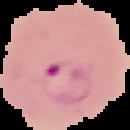

In [58]:
#facon d afficher les photos avec tensorflow.keras 

from tensorflow.keras.preprocessing import image

my_image = image.load_img (photo_1 ,   #le path 
                       target_size = image_shape )  #la taille

#l avantage est de reshape la taille de l image 
my_image

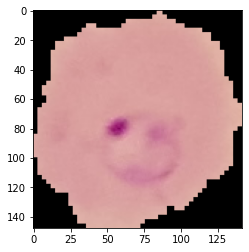

In [59]:
plt.imshow (imread (photo_1))

#alors qu avec matplotlib il n y a pas de reshape

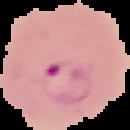

In [60]:
my_image 

In [65]:
# transforme la photo en array (equivalent a imread)
#mais l image a ete reshape a l aide de la methode image.load_img ()
my_immage_arr = image.img_to_array (my_image)
my_immage_arr 

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [66]:
my_immage_arr.shape

(130, 130, 3)

In [70]:
#nous allons augmenter les dim pour mettre le nombre d image (ici 1photo)
# car nottre modele attend un batch 
# donc ici nous voulons (1 photo,130,130,3)

my_img = np.expand_dims (  my_image , axis = 0 )
my_img.shape

(1, 130, 130, 3)

In [73]:
(model.predict (my_img) >0.5).astype ('int')

array([[0]])

In [74]:
train_image_gen.class_indices
#donc la classe 0 = parasitized (cellule infectée)

{'parasitized': 0, 'uninfected': 1}